In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#download the weather images and put them in a directory
path = r'/content/drive/MyDrive/Machine Learning 1.5/Visualization/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [12]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 907 images belonging to 4 classes.
Found 225 images belonging to 4 classes.


In [17]:
#this is a CNN to categorize the weather images
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [18]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator,
    epochs = 40, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 229s 7s/step - accuracy: 0.4455 - loss: 0.1542 - val_accuracy: 0.6696 - val_loss: 0.1330
Epoch 2/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7188 - loss: 0.0904 - val_accuracy: 1.0000 - val_loss: 1.7586e-13
Epoch 3/40


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


28/28 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 0.7429 - loss: 0.0865 - val_accuracy: 0.8170 - val_loss: 0.0742
Epoch 4/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 312ms/step - accuracy: 0.8438 - loss: 0.0769 - val_accuracy: 1.0000 - val_loss: 4.6033e-17
Epoch 5/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 129s 5s/step - accuracy: 0.7804 - loss: 0.0792 - val_accuracy: 0.7812 - val_loss: 0.0837
Epoch 6/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 382ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 2.0709e-12
Epoch 7/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - accuracy: 0.8073 - loss: 0.0737 - val_accuracy: 0.7188 - val_loss: 0.1181
Epoch 8/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 317ms/step - accuracy: 0.7812 - loss: 0.1011 - val_accuracy: 0.0000e+00 - val_loss: 0.4886
Epoch 9/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.7973 - loss: 0.0710 - val_accuracy: 0.7545 - val_loss: 0.0931
Epoch 10/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7500 - loss: 0.0725 - val_accuracy: 1.0

In [20]:
results = pd.DataFrame(model.history.history)

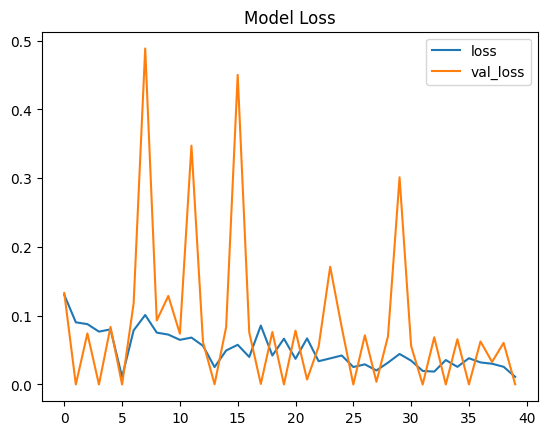

In [22]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig(os.path.join(path, 'loss.png'))

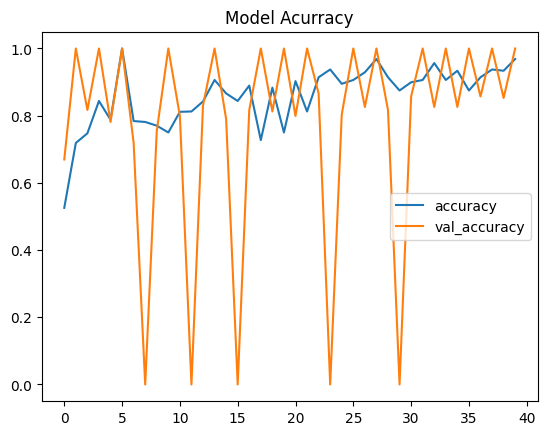

In [23]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig(os.path.join(path, 'accuracy.png'))

In [24]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.96875, Val_Accuracy: 1.0
Loss: 0.011090844869613647, Val_Loss: 0.0003004536556545645


11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


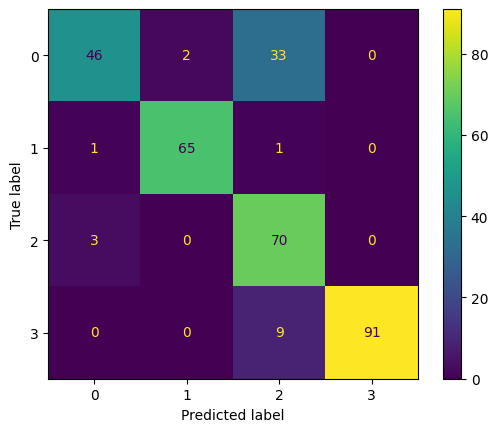

<Figure size 640x480 with 0 Axes>

In [25]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig(os.path.join(path, 'confusion_matrix.png'))

In [26]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

In [27]:
predict_one(model, 10) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

Output hidden; open in https://colab.research.google.com to view.

2 cloudy class were wrongly predicted as shine and rain and 1 one sunrise class was predicted as shine. 7 out of 10 class were predicted accurately